In [ ]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print("Done!")
    print("Accuracy:", accuracy)

In [ ]:
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

learning_rate = 0.01
training_epochs = 1000
display_step = 50

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [ ]:
import os
import urllib

import numpy as np
import tensorflow as tf

IRIS_TRAINING = "./iris_training.csv"
IRIS_TRAINING_URL = "http://download.tensorflow.org/data/iris_training.csv"

IRIS_TEST = "./iris_test.csv"
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

def main():
    if not os.path.exists(IRIS_TRAINING):
        raw = urllib.request.urlopen(IRIS_TRAINING_URL).read()
        with open(IRIS_TRAINING, "wb") as f:
            f.write(raw)

    if not os.path.exists(IRIS_TEST):
        raw = urllib.urlopen(IRIS_TEST_URL).read()
        with open(IRIS_TEST, "wb") as f:
            f.write(raw)

    training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
        filename=IRIS_TRAINING, target_dtype=np.int, features_dtype=np.float32)
    test_set = tf.contrib.learn.datasets.base.load_csv_with_header(
        filename=IRIS_TEST, target_dtype=np.int, features_dtype=np.float32)

    feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]
    classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                                  hidden_units=[10, 20, 10],
                                                  n_classes=3,
                                                  model_dir="/tmp/iris_model")
    
    def get_train_inputs():
        x = tf.constant(training_set.data)
        y = tf.constant(training_set.target)
        return x, y

    classifier.fit(input_fn=get_train_inputs, steps=2000)

    def get_test_inputs():
        x = tf.constant(test_set.data)
        y = tf.constant(test_set.target)
        return x, y

    accuracy_score = classifier.evaluate(input_fn=get_test_inputs, steps=1)["accuracy"]
    print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

    def new_samples():
        return np.array(
            [[6.4, 3.2, 4.5, 1.5],
             [5.8, 3.1, 5.0, 1.7]], dtype=np.float32)

    predictions = list(classifier.predict(input_fn=new_samples))

    print("New Samples, Class Predictions:    {}\n".format(predictions))
main()

C:\Users\acorn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Class: daisy


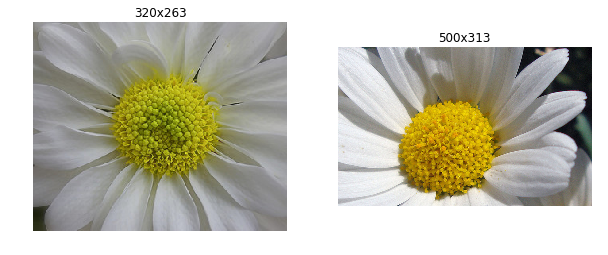

Class: dandelion


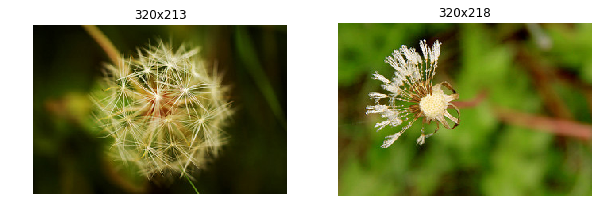

Class: roses


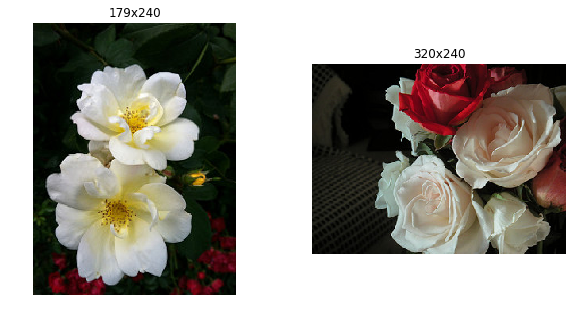

Class: sunflowers


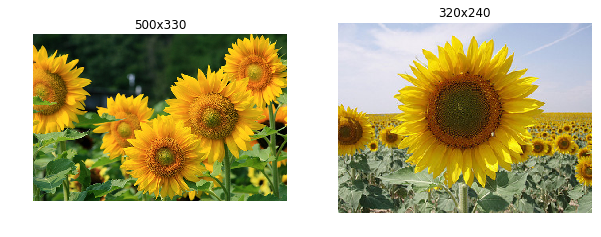

Class: tulips


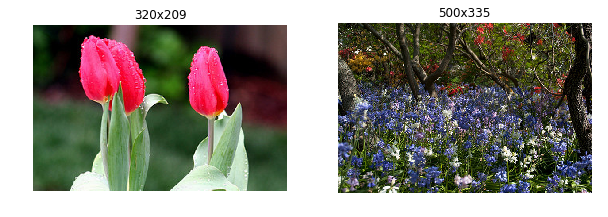

In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np 

width = 299
height = 299
channels = 3 # 채널

import os
FLOWERS_PATH = os.path.join("datasets")
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")
flower_classes = sorted([dirname for dirname in os.listdir(
    flowers_root_path)
                         if os.path.isdir(
                             os.path.join(flowers_root_path, dirname))])

from collections import defaultdict
image_paths = defaultdict(list)
for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if(filepath.endswith(".jpg")):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))
    
import matplotlib.pylab as plt
import matplotlib.image as mpimg
n_examples_per_class = 2

for flower_class in flower_classes:
    print("Class:", flower_class)
    plt.figure(figsize=(10, 5))
    for index, example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:, :, :channels]
        plt.subplot(100 + n_examples_per_class *10 +index+1)
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()

In [3]:
from scipy.misc import imresize
def prepare_image(image, target_width=299, target_height=299, max_zoom=0.2):
    height = image.shape[0]
    width = image.shape[1]
    
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
    
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    image = image[y0:y1, x0:x1]
    if(np.random.rand() < 0.5):
        image = np.fliplr(image)
    # 보간법 : 점들 간격의 평균값으로 대체
    image = imresize(image, (target_width, target_height))
    return image.astype(np.float32) / 255 # 0 ~ 1 사이로 이미지의 컬러 값을 정규화함

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


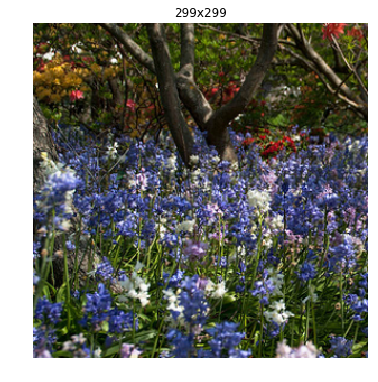

In [4]:
example_image = prepare_image(example_image)
plt.figure(figsize=(6, 8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.show()    

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


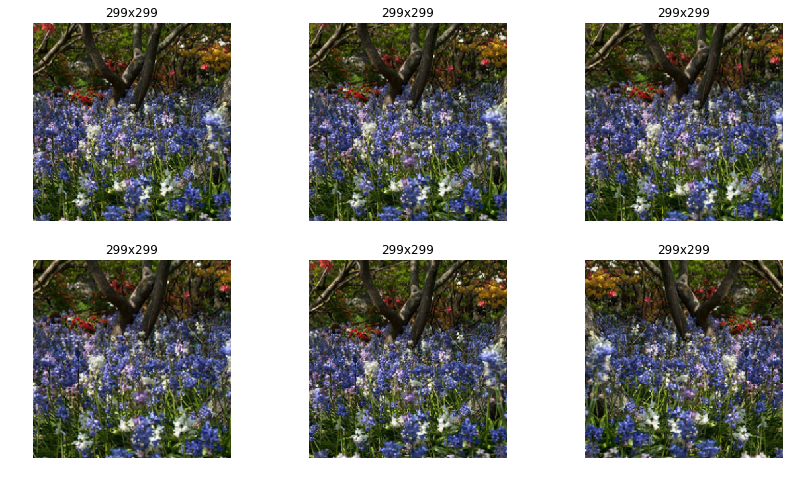

In [5]:
rows, cols = 2, 3
plt.figure(figsize=(14, 8))
for row in range(rows):
    for col in range(cols):
        prepared_image = prepare_image(example_image)
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
        plt.imshow(prepared_image)
        plt.axis("off")
plt.show()

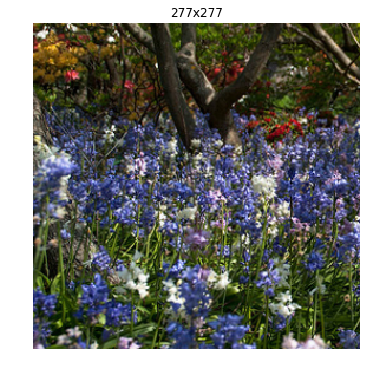

In [6]:
# prepare_image를 tensorflow로 변환
def prepare_image_with_tensorflow(image, target_width=299, target_height=299, max_zoom=0.2):
    image_shape = tf.cast(tf.shape(image), tf.float32)
    height = image_shape[0]
    width = image_shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    
    crop_width = tf.cond(crop_vertically, lambda: width, lambda: height * target_image_ratio)
    crop_height = tf.cond(crop_vertically, lambda: width / target_image_ratio, lambda: height)

    resize_factor = tf.random_uniform(shape=[], minval=1.0, maxval=1.0 + max_zoom)
    crop_width = tf.cast(crop_width / resize_factor, tf.int32)
    crop_height = tf.cast(crop_height / resize_factor, tf.int32)
    box_size = tf.stack([crop_height, crop_width, 3])
    image = tf.random_crop(image, box_size)
#     image = tf.image.random_flip_left_right(image)
#     image_batch = tf.expand_dims(image, 0)
#     image_batch = tf.image.resize_bilinear(image_batch, [target_height, target_width])
#     image = image_batch[0] / 255
    return image

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
reset_graph()
input_image = tf.placeholder(tf.uint8, shape = [None, None, 3])
prepared_image_op = prepare_image_with_tensorflow(example_image)

with tf.Session() as sess:
    prepared_image = prepared_image_op.eval(feed_dict={input_image: example_image})
    
plt.figure(figsize=(6, 6))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

In [7]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

reset_graph()

X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
training = tf.placeholder_with_default(False, shape=[])

# slim.arg_scope : 오퍼레이션마다 중복된 인자값을 공통으로 사용하는 함수
# with의 수명까지 다른 함수의 default값으로 제공되는 값이 입력되므로 다시 메소드에 인자값을 넣어줄 필요가 없다.
with slim.arg_scope(inception.inception_v3_arg_scope()):
    # num_classes=1001
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=training)

inception_saver = tf.train.Saver()

prelogits = tf.squeeze(end_points["PreLogits"], axis=[1, 2])
n_outputs = len(flower_classes)

In [8]:
# fully connected layer
with tf.name_scope("new_output_layer"):
    # activation을 적용해 출력
    flower_logits = tf.layers.dense(prelogits, n_outputs, name="flower_logits", activation=tf.nn.relu)
    # 예측 값 = hypothesis
    Y_proba = tf.nn.softmax(flower_logits, name="Y_proba")
    
y = tf.placeholder(tf.int32, shape=[None])

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=flower_logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    flower_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="flower_logits")
    training_op = optimizer.minimize(loss, var_list=flower_vars)
    
with tf.name_scope("eval"):
    # in_top_k = argmax
    correct = tf.nn.in_top_k(flower_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

[v.name for v in flower_vars]
flower_class_ids = {flower_class: index for index, flower_class in enumerate(flower_classes)}
flower_class_ids

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [9]:
flower_paths_and_classes = []
print(flower_class_ids)
for flower_class, paths in image_paths.items():
    for path in paths:
        flower_paths_and_classes.append((path, flower_class_ids[flower_class]))

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [11]:
test_ratio = 0.2
train_size = int(len(flower_paths_and_classes) * (1 - test_ratio))
np.random.shuffle(flower_paths_and_classes)
flower_paths_and_classes_train = flower_paths_and_classes[:train_size]
flower_paths_and_classes_test = flower_paths_and_classes[train_size:]
flower_paths_and_classes_train[:3]

[('datasets\\flower_photos\\daisy\\19834392829_7d697871f6.jpg', 0),
 ('datasets\\flower_photos\\sunflowers\\5957007921_62333981d2_n.jpg', 3),
 ('datasets\\flower_photos\\tulips\\7166635566_ee240b5408_n.jpg', 4)]

In [12]:
from random import sample

def prepare_batch(flower_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    prepared_images = [prepare_image(image) for image in images]
    X_batch = np.stack(prepared_images)
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    
    return X_batch, y_batch

X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size=4)
X_batch.shape

X_test, y_test = prepare_batch(flower_paths_and_classes_test, batch_size=len(flower_paths_and_classes_test))
X_test.shape 

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


(734, 299, 299, 3)

In [ ]:
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")
n_epochs = 10
batch_size = 64
n_iterations_per_epoch = len(flower_paths_and_classes_train) // batch_size

with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

    for epoch in range(n_epochs):
        print("Epoch", epoch, end="")
        for iteration in range(n_iterations_per_epoch):
            print(".", end="")
            X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})

        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("  Train accuracy:", acc_train)

        save_path = saver.save(sess, "./my_flowers_model")

    print("Computing final accuracy on the test set (this will take a while)...")
    acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
    print("Test accuracy:", acc_test)

In [ ]:
# 숙제 : 약 78% 정확도를 목표 98%로 개선하시오